# k-sample Reservoir Sampling:

In [1]:
import random


def print_selected_items(reservoir: list):
    number_of_items = str(len(reservoir))
    print("Number of items selected: {} \n".format(number_of_items))
    print(''.join(map(str, reservoir)))
    

        
def sample(path: str, k: int):
    n = k - 1  # current index of data stream
    
    fd  = open(path, 'r') 
    
    
    # read the first k rows of the data stream and store them into memory (reservoir).
    reservoir = []
    for i in range(k):
        item = fd.readline()
        if not item:
            break  
        reservoir.append(item)
    # reservoir now contains k randomly picked items from data stream
        
    while True:  
        item = fd.readline()
        
        if not item:  # if EOF is reached, leave.
            break
            
        uniformly_selected_index = random.randrange(0, n-1)  # select a random number in range [0, n-1]
        
        n += 1  # moving the tape to the next element of stream 
        
        if (uniformly_selected_index < k):  
            # with a probability of k/n, replace an item in memory (specifically, at index i) with the currently selected one. 
            reservoir[uniformly_selected_index] = item
    
    
    print_selected_items(reservoir)
    return reservoir


def main():
    res = sample("input.txt", 10)

    
if __name__ == "__main__":
    main()
    

Number of items selected: 10 

Alfonzo McKinnie
Jason Collins
Adrian Oliver
Shawn Jones
Josh Davis
Jamal Crawford
Mo Williams
Hedo Turkoglu
Tyson Chandler
Luis Scola



# Proof that the probability of selecting any element of a stream is k/n:

1) Case where the element is in positions [0, k] of the stream: Since the element is by default selected for storage in the reservoir, we will calculate the probability that it survives potential replacements by elements in positions [k+1, n] of the stream. The probability will be equal to the probability that it is not replaced by any of the n-k-1 elements that can replace it. Therefore,

P("survival of element in [0, k]") = 

(1 - (1 / k+1)) * (1 - (1 / k+2)) * ... * (1 - (1/n)) = 

(k / (k+1)) * ((k+1) / (k+2)) * ((n-1) / n) = k/n. 

Note: We assume that the probability of selecting an element for insertion is equal to 1/k, with k being the position of the element in the stream.

2) Case where the element is in positions [k+1, n] of the stream: To select the object from the stream, i must take values in the range [0, k] with probability k/y, where y is the value of n at that time. Assuming the object is indeed inserted into the reservoir, it must not be replaced by any upcoming element in order to survive. Therefore,

P("survival of element in [k+1, n]") = 

P("insertion into reservoir") * P("non-replacement by upcoming element") =

= k/y * (1 - (1 / y+1)) * (1 - (1 / y+2)) * ... * (1 - (1 / (n-1))) * (1 - (1/n)) =

= k/y * (y/y+1) * (y+1/y+2) * ... * (n-2/n-1) * (n-1/n) = k/n.

# Weighted Reservoir Sampling:

# How it works:

We initialize the weight sum ('W') to 0. Then, for each new data point we receive from the stream, we assign a random weight ('wi') to it which is added to the current weight sum (W += wi). The condition for replacing the currently stored data in memory with the current data is to uniformly select a random decimal number ('uniformly_selected_weight') in the range [0, W-1] that is less than or equal to wi. This will happen with probability wi/W, since the uniformly selected number essentially needs to be located in the positions 0 up to wi in the sequence of real numbers [0, .., wi, ..., , W]. Since the random number follows a continuous uniform distribution, using the CDF of the continuous uniform distribution, we have that P(0 < uniformly_selected_weight < wi) = (wi - 0) * [1 / (W-0)] = wi * (1/W) = wi/W.


In [2]:
import random


def print_selected_item(selected_item: str, selected_item_wi: float):
    print("Item selected: {}".format(selected_item))
    print("Item's wi = {}".format(selected_item_wi))
    

        
def weighted_sample(path: str):
    W = 0  # sum of all weights of data stream.
    
    fd  = open(path, 'r') 
    
    selected_item = ''
    selected_item_wi = 0
    
    while True:  
        item = fd.readline()
        
        if not item:          # if EOF is reached, leave.
            break
            
        wi = random.random()  # weight of current item
        W += wi               # adding to the overall weight of data stream.
        
        uniformly_selected_weight = random.uniform(0, W-1)  # randomly select a float in the range [0, W-1]
        
        if (uniformly_selected_weight < wi):
             # with a probability of wi/W, replace the item in memory with the currently selected one.
            selected_item = item
            selected_item_wi = wi
  
    print_selected_item(selected_item, selected_item_wi)
    return selected_item


def main():
    res = weighted_sample("input.txt")

    
if __name__ == "__main__":
    main()
    


Item selected: Chris Johnson

Item's wi = 0.9702215171334464


# Log-log plot:

If we take the logarithm of an exponential function, we get a linear result, whereas if we take the logarithm of a linear function, we get a non-linear result.

$\log(a \cdot x^k) = \log(a) + k \cdot \log(x)$, which is linear.

$\log(a \cdot x + b)$, which is non-linear.

Therefore, we will plot the Log-log plots of the two functions B-A and C-A, and if this returns a linear result, then we know that the relationship is exponential. Otherwise, the relationship is linear.

data dataframe has length = 1000

Null values for every column of data dataframe: 

A    0
B    0
C    0
dtype: int64




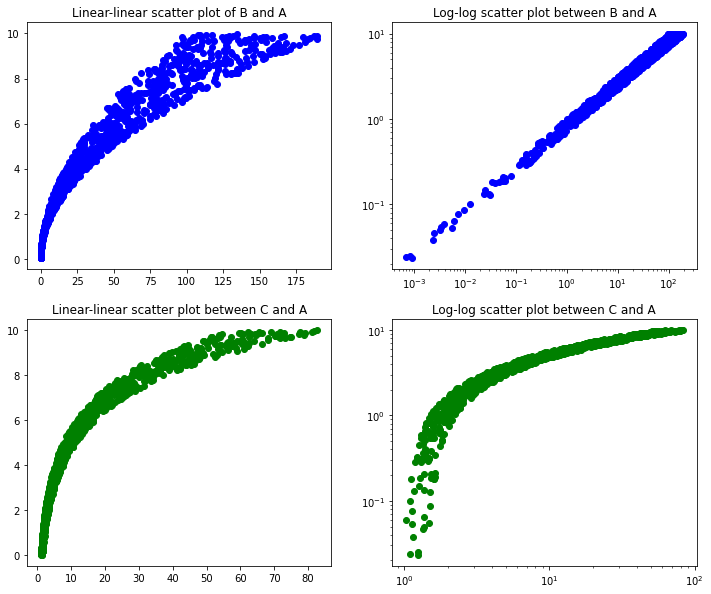

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')


def store_data(csv_path: str):
    return pd.read_csv(csv_path)

def plot_function(x: list, y):
    fig, ax = plt.subplots(2, 2, figsize=(12,10))
    
    
    ax[0, 0].title.set_text('Linear-linear scatter plot of {}'.format(x[0].name) + " and {}".format(y.name))
    ax[0, 0].set_xscale("linear"); ax[0, 0].set_yscale("linear")  # not needed.
    ax[0, 0].scatter(x[0], y, color='blue')
    
    ax[0, 1].title.set_text('Log-log scatter plot between {}'.format(x[0].name) + " and {}".format(y.name))
    ax[0, 1].set_xscale("log", base=10); ax[0, 1].set_yscale("log", base=10)
    ax[0, 1].scatter(x[0], y, color='blue')
    
    ax[1, 0].title.set_text('Linear-linear scatter plot between {}'.format(x[1].name) + " and {}".format(y.name))
    ax[1, 0].set_xscale("linear"); ax[1, 0].set_yscale("linear")  # not needed.
    ax[1, 0].scatter(x[1], y, color='green')
    
    ax[1, 1].title.set_text('Log-log scatter plot between {}'.format(x[1].name) + " and {}".format(y.name))
    ax[1, 1].set_xscale("log", base=10); ax[1, 1].set_yscale("log", base=10)
    ax[1, 1].scatter(x[1], y, color='green')
    

    

    
def main():
    df = store_data("data.csv")
    print_dataframe_stats(df, 'data')
    
    plot_function([df['B'], df['C']], df['A'])
   
    
    
if __name__ == "__main__":
    main()

# Understanding the structure of the probability distribution of review count for businesses:

business dataframe has length = 10692

Null values for every column of business dataframe: 

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64




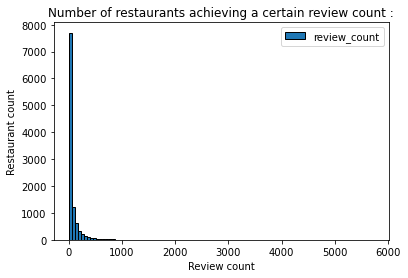

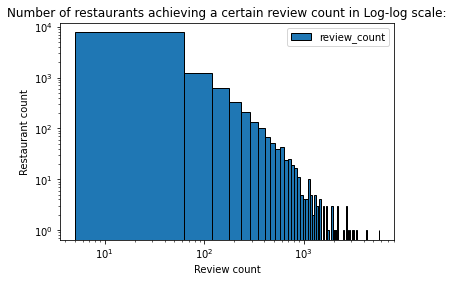

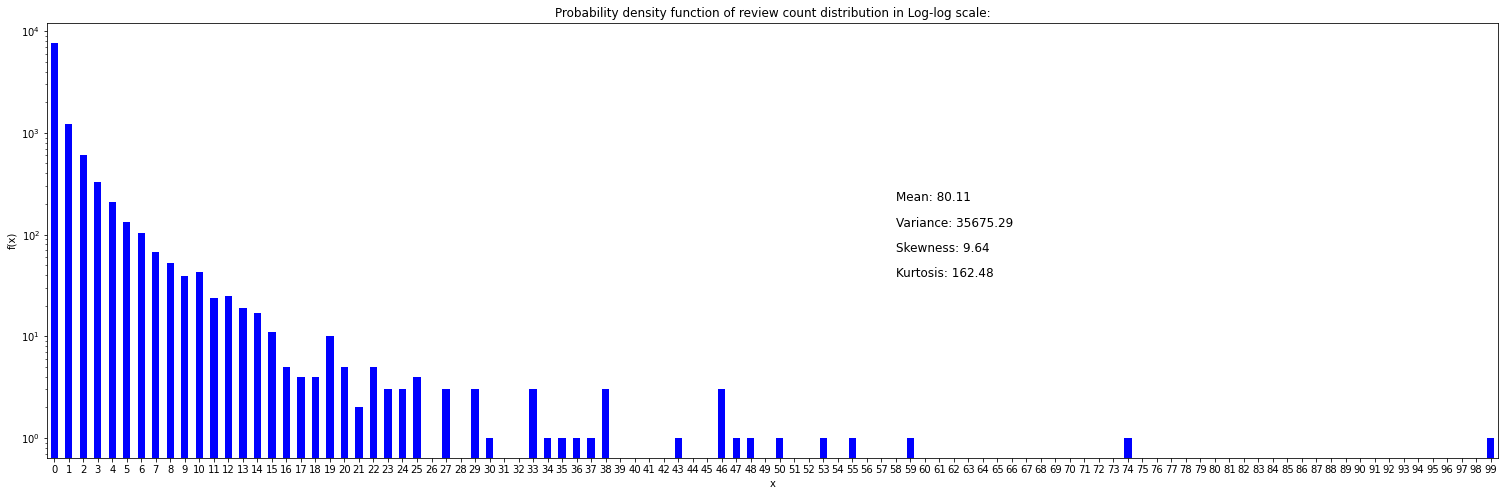

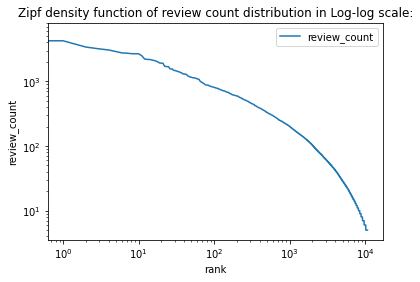

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np


def load_data_business_json(path="yelp_academic_dataset_business.json"):
    return pd.read_json(path, lines=True).query('city == "Philadelphia"')



def load_data_review_json(path="yelp_academic_dataset_review.json"):
    data_file = open(path, encoding='utf-8')
    
    data = [json.loads(line) for line in data_file]
        
    df = pd.DataFrame(data)
    data_file.close()

    return df

def preprocess_and_extract_to_csv():
    df_business = load_data_business_json()
    df_review = load_data_review_json()

    df_review = df_review[df_review['business_id'].isin(df_business['business_id'].values)]
    
    df_business.to_csv('business.csv', index=False)
    df_review.to_csv('review.csv', index=False)
    
    
    
def load_csvs(file: str):
    if file == "business":
        df = pd.read_csv("business.csv")
    else: 
        df = pd.read_csv("review.csv")
    
    
    df.replace('r\s\s*', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    return df.dropna()
    

def plot_review_count_frequency_histogram(df_business, loglog_scale: bool):
    fig, review_count_plot = plt.subplots()
    review_count_plot = df_business["review_count"].plot(kind='hist', bins=100, edgecolor='black', loglog=loglog_scale, 
                                                         legend=True, title="Number of restaurants achieving a certain" 
                                                         " review count {loglog}:".format(loglog='in Log-log scale' 
                                                                                          if loglog_scale else ""))
    review_count_plot.set_xlabel("Review count")
    review_count_plot.set_ylabel("Restaurant count")

    
    
def plot_review_count_pdf(df_business):
    
    labels = [i for i in range(0, 100)]
    cut = pd.cut(df_business['review_count'], bins=100, labels=labels)
    
    
    
    fig, pdf_plot = plt.subplots()
    cut.value_counts(sort=False).plot.bar(rot=0, color="b", log=True, title="Probability density function of"
                                          " review count distribution in Log-log scale:",
                                          figsize=(26,8))
    
    (mean, var, skew, kurtosis) = calculate_review_count_pdf_statistics(df_business)
    
    font = {'color':  'k',
            'size': 12 }
    
    plt.text(58, 213.2, "Mean: {}".format(mean), fontdict = font)
    plt.text(58, 118.2, "Variance: {}".format(var), fontdict = font)
    plt.text(58, 68.2, "Skewness: {}".format(skew), fontdict = font)
    plt.text(58, 38.2, "Kurtosis: {}".format(kurtosis), fontdict = font)
    
    
    pdf_plot.set_xlabel("x")
    pdf_plot.set_ylabel("f(x)")
    
    

    
    
    
def plot_review_count_zipf(df_business):
    df_business = df_business.sort_values(by='review_count', ascending=False)
    df_business = df_business.reset_index()
    
    
    
    zipf_plot = df_business.plot(kind='line', use_index=True, y='review_count', loglog=True, title="Zipf density function of"
                                          " review count distribution in Log-log scale:")
    
    zipf_plot.set_xlabel("rank")
    zipf_plot.set_ylabel("review_count")

    
    
    
    
    
    
    
def calculate_review_count_pdf_statistics(df_business):
    rc_mean = round(df_business['review_count'].mean(), 2)
    rc_var = round(df_business['review_count'].var(), 2)
    rc_skew = round(df_business['review_count'].skew(), 2)
    rc_kurtosis = round(df_business['review_count'].kurtosis(), 2)
    
    return (rc_mean, rc_var, rc_skew, rc_kurtosis)
    
    
    

  


    
def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')
    
    
    
    
def main():
    # preprocess_and_extract_to_csv()
    df_business = load_csvs("business")
    
    print_dataframe_stats(df_business, "business")
    
        
    
    
    
    plot_review_count_frequency_histogram(df_business.copy(), False)  # A.1
    plot_review_count_frequency_histogram(df_business.copy(), True)   # A.2
    plot_review_count_pdf(df_business.copy())  # Α.3
    plot_review_count_zipf(df_business.copy()) # A.4
    


if __name__ == "__main__":
    main()   
    
    
  
   
      



# Analysis of review_count probability distribution: 


Initially, we observe that the mean value of the distribution is equal to 78.24. However, the very high value of the variance (34617.84) informs us that there is a significant heterogeneity in the data. Therefore, the samples are quite far apart from each other on average. Thus, the mean value is not a reliable measure of evaluation.

From the histogram, we can also see the positive skewness of the distribution, with a skewness value of 9.77. An absolutely symmetric distribution (e.g. normal distribution) has zero skewness. Therefore, most observations are located in the low values of review_count.

Finally, the very high value of the kurtosis of the distribution informs us of the existence of many outliers. The normal distribution has a kurtosis equal to 3, while in our case, the distribution has a value of 167.13. The distribution is leptokurtic, meaning that the "tails" of the distribution converge much more slowly towards 0. This is an indication of the presence of more extreme values (outliers).


  


# How time predetermines review counts for businesses?

review dataframe has length = 895211

Null values for every column of review dataframe: 

business_id    0
date           0
stars          0
dtype: int64




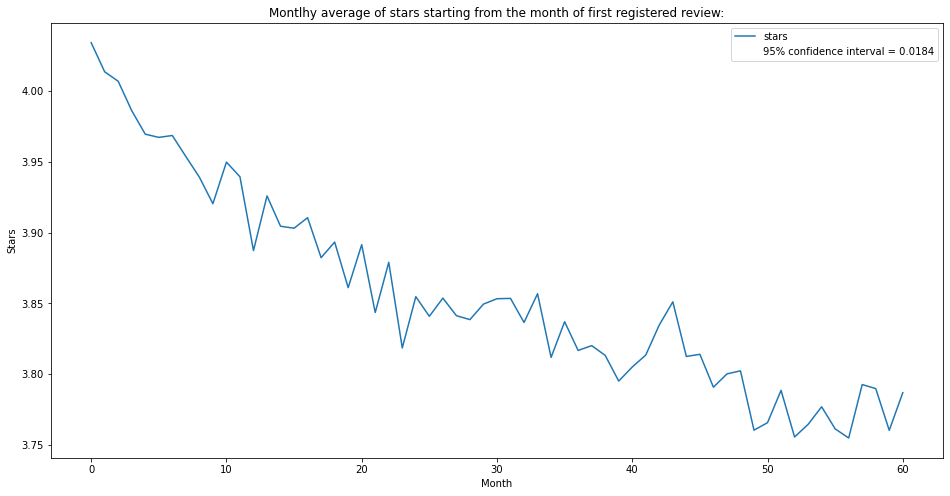

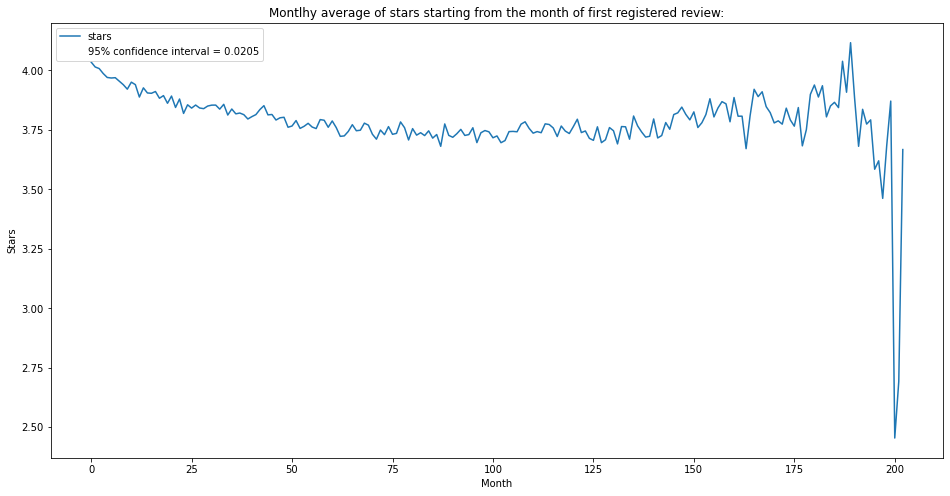

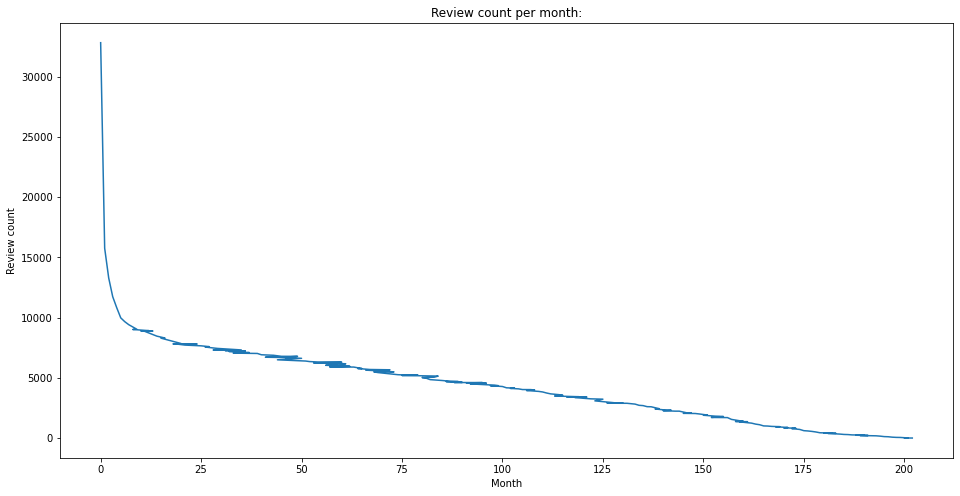

In [7]:
from datetime import datetime as dt
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt




def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')
    


def load_csvs(file: str):
    if file == "business":
        df = pd.read_csv("business.csv")
    else: 
        df = pd.read_csv("review.csv")
    
    df.replace('r\s\s*', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    return df.dropna()



def prepare_review_csv():
    df_review = load_csvs("reviews")
    
    df_review = df_review.filter(items=['business_id', 'date', 'stars'])
    df_review.to_csv("review_B.csv", index=False)
    
    

    
def get_first_review_df(df_review):
    return df_review.sort_values(by='date', ascending=True).drop_duplicates(subset='business_id').rename(columns={'date':'first_date'})
    
    
    
def get_month_distance_indicated_df(df_review, first_review_df, max_5_years_after: bool):
    df = pd.merge(df_review, first_review_df, on='business_id', how='left')
   
    if max_5_years_after:
        indexDate = df[((df['date'] - df['first_date']) // np.timedelta64(1, 'M')) > 60].index
        df.drop(indexDate , inplace=True)
        
        
        
    
    df = df.drop(columns=['month_y', 'stars_y']).rename(columns={'stars_x':'stars', 'month_x':'month'})
    df['month'] = (df['date'] - df['first_date']) // np.timedelta64(1, 'M') 
    return df
    

    
def confidence_interval_95(df, conf=0.95):
    t = stats.t.ppf((1+conf) / 2.0, len(df)-1)
    return t * df.sem()



def plot_monthly_average(df):
    month_avg_stars_series = df.groupby('month')['stars'].mean()
    conf = round(confidence_interval_95(month_avg_stars_series), 4)
    
    fig, star_plot = plt.subplots()
    star_plot = month_avg_stars_series.plot(kind='line', x='month', y='stars', figsize=(16,8), title="Montlhy average of"
                                          " stars starting from the month of first registered review:",
                                           label='stars')
    
    star_plot.set_xlabel("Month")
    star_plot.set_ylabel("Stars")
    
    star_plot.plot([], [], ' ', label='95% confidence interval = {}'.format(conf))
    star_plot.legend()

    
    
def plot_month_review_count(df):
    fig, month_plot = plt.subplots()
    month_plot = df['month'].value_counts().plot(kind='line', use_index=True, y='month', figsize=(16,8), 
                                                 title="Review count per month:")
    month_plot.set_xlabel("Month")
    month_plot.set_ylabel("Review count")
    
 

   

def main():
    # prepare_review_csv()
    
    df_review = pd.read_csv("review_B.csv")
    
    print_dataframe_stats(df_review, "review")
   
    
    
    df_review['date'] = pd.to_datetime(df_review['date'])
    df_review['month'] = 0
    
    
    first_review_df = get_first_review_df(df_review.copy())
    
    df = get_month_distance_indicated_df(df_review.copy(), first_review_df.copy(), True)
    plot_monthly_average(df.copy())
    
    df = get_month_distance_indicated_df(df_review.copy(), first_review_df.copy(), False)
    plot_monthly_average(df.copy())
    
    plot_month_review_count(df.copy())
    
   
    
if __name__ == "__main__":
    main()


In the **first graph**, the evolution of the average star rating is shown from the date of the first review until 5 years later. We observe a downward trend in the average rating, which may be due to two reasons. Initially, in the early days of the business, a significant percentage of the customers are people who are close to the employees of the business. Therefore, leniency is much higher. This leniency may be even higher if the restaurant is a new, different aesthetic or type of food choice. This begins to weaken when the proportion of customers looking to try a new option decreases and the type of customers becomes more homogeneous. Therefore, the start of a business gives an extra leniency in the rating due to the opportunity it offers to explore a new option.
    
In the **second graph**, the evolution of the average star rating from the date of the first review until the last chronologically registered review is shown. The general trend of the graph is stable until the last few months, where there is a very high variation in the observations. In the last months of the graph, we have observations that resulted from a small number of reviews (small number of samples). One possible explanation for the unstable trend of the graph in the last few months is the differentiation between the last months and all previous ones in terms of the distribution they follow. The previous months contain a sufficiently large number of samples compared to the last ones. This is evident from the third graph, which shows us the frequency of reviews per month. According to the Central Limit Theorem, if we have a large number of samples, the distribution they follow will converge asymptotically to normal. Thus, months with a large number of samples have a similar variation that equals the normalized variation in terms of the number of reviews they would have had if they followed a normal distribution. The last months with a smaller number of samples do not follow asymptotically a normal distribution, so the variation does not correspond to that of the first months, being quite high.






# Area-Businesses price correlation:

In the following cell, we will investigate whether there is a correlation between the value of a city area and the businesses located in that area. The hypothesis is that expensive areas are those where there are many businesses or highly-rated businesses.

business dataframe has length = 10692

Null values for every column of business dataframe: 

business_id    0
region         0
stars          0
dtype: int64


business (after counting businesses for every region) dataframe has length = 69

Null values for every column of business (after counting businesses for every region) dataframe: 

region            0
business_count    0
stars             0
dtype: int64


real estate dataframe has length = 106

Null values for every column of real estate dataframe: 

region               0
median_sale_price    0
dtype: int64


Covariance Matrix for columns of all regions dataframe:
-----------------------------------------------------------------
                   business_count         stars  median_sale_price
business_count       6.182420e+04     39.646210       2.723134e+07
stars                3.964621e+01      0.139440       3.337928e+04
median_sale_price    2.723134e+07  33379.277442       2.247873e+10

Pearson correlation matrix for all re

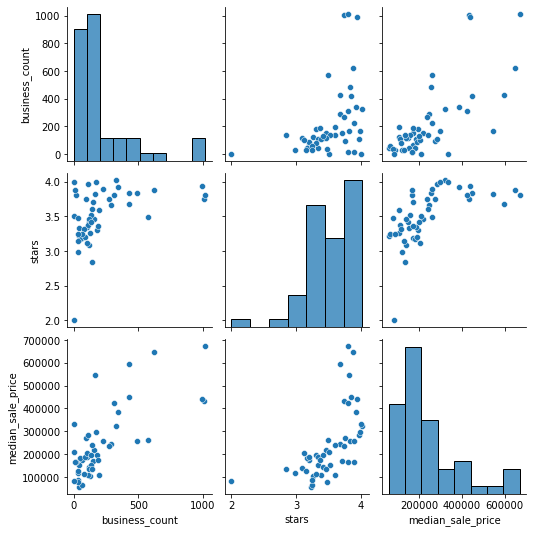

Covariance Matrix for columns of regions over 200.000$ dataframe:
-----------------------------------------------------------------
                   business_count         stars  median_sale_price
business_count       9.269538e+04     11.589620       2.608161e+07
stars                1.158962e+01      0.046313       1.087180e+04
median_sale_price    2.608161e+07  10871.803433       2.064924e+10

Pearson correlation matrix for regions with mean value over 200k dollars:
----------------------------------------------------------------------------------------------
                   business_count     stars  median_sale_price
business_count           1.000000  0.176885           0.596147
stars                    0.176885  1.000000           0.351561
median_sale_price        0.596147  0.351561           1.000000


p-values for regions with mean value over 200k dollars:
----------------------------------------------------------------------------------------------


p-value for business_co

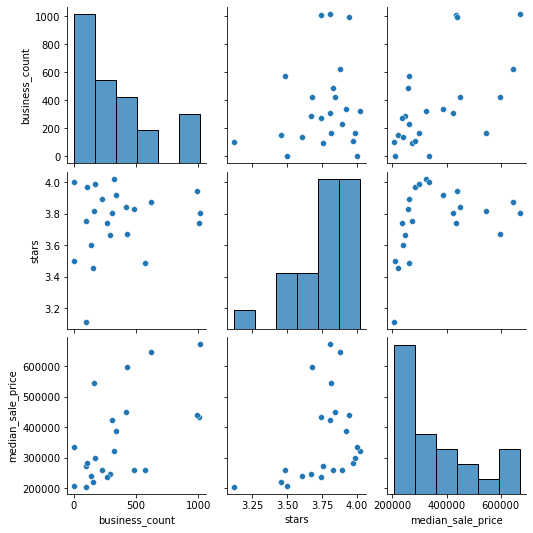

In [8]:
import seaborn
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np



def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')
    
    


def load_csvs(file: str):
    if file == "business":
        df = pd.read_csv("business.csv")
    else: 
        df = pd.read_csv("review.csv")
    
    df.replace('r\s\s*', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    return df.dropna()



def prepare_business_csv():
    df_business = load_csvs("business")
    df_business = df_business.filter(items=['business_id', 'postal_code', 'stars'])
    df_business.to_csv("business_C.csv", index=False)



def load_and_preprocess():
    df = pd.read_csv('RedfinPhila.tsv', sep='\t', header=0)  # load .tsv
    df = df[['region', 'median_sale_price']]
    
    df['median_sale_price'] = df.groupby('region')['median_sale_price'].transform('mean')
    
    df['region'] = df['region'].str.replace('Zip Code: ', '').astype(int)
    
    return df.drop_duplicates()



def print_pvalues(df, only_expensive_businesses):
    print('\n')
    print('==============================================================================================')
    print("p-values{expensive}".format(expensive=' for regions with'
                                                           + ' mean value over 200k dollars:' if only_expensive_businesses
                                                          else " for all regions:"))
    print('----------------------------------------------------------------------------------------------')
    
    for column_name_i in df.columns:
        print('\n')
        for column_name_j in df.columns:
            p_value = str(stats.pearsonr(df[column_name_i], df[column_name_j])[1])
            print('p-value for ' + column_name_i + '-' + column_name_j + ' = {}'.format(p_value))

            
            
            
def print_pearson_corr(df, only_expensive_businesses: bool):
    print('==============================================================================================')
    print("Pearson correlation matrix{expensive}".format(expensive=' for regions with'
                                                           + ' mean value over 200k dollars:' if only_expensive_businesses
                                                          else " for all regions:"))
    print('----------------------------------------------------------------------------------------------')
    df_corr = df.corr(method='pearson')
    print(df_corr)
    
    
    
def print_covariance_matrix(df, df_name):
    print('==================================================================')
    print("Covariance Matrix for columns of " + df_name + " dataframe:")
    print('-----------------------------------------------------------------')
    print(df.cov())
    print('================================================================= \n')

def plot_correlation_graphs(df_real_estate, df_business, only_expensive_businesses: bool):
    df_area = pd.merge(df_real_estate, df_business, on='region', how='left').dropna().drop_duplicates(subset=['region'])
    df_area = df_area[['business_count', 'stars', 'median_sale_price']]
    
    df_name = 'all regions'
    if only_expensive_businesses:
        df_area = df_area.loc[df_area['median_sale_price'] > 200000]
        df_name = 'regions over 200.000$'
        
    print_covariance_matrix(df_area, df_name)
    
    seaborn.pairplot(df_area)
    
    print_pearson_corr(df_area.copy(), only_expensive_businesses)
    print_pvalues(df_area.copy(), only_expensive_businesses)
        
    plt.show()

    
    
def main():
    prepare_business_csv()
    df_business = pd.read_csv("business_C.csv").rename(columns={'postal_code':'region'})
    
    print_dataframe_stats(df_business, "business")
    
    
    df_business = df_business.dropna().astype({'region':'int'})
    df_business['stars'] = df_business.groupby('region')['stars'].transform('mean')
    df_business['business_count'] = df_business.groupby('region')['business_id'].transform('count')
   
    df_business = df_business[['region', 'business_count', 'stars']].drop_duplicates(subset=['region'])
    
    print_dataframe_stats(df_business, "business (after counting businesses for every region)")
    
    df_real_estate = load_and_preprocess()
    
    print_dataframe_stats(df_real_estate, "real estate")
    
    plot_correlation_graphs(df_real_estate.copy(), df_business.copy(), False)
    plot_correlation_graphs(df_real_estate.copy(), df_business.copy(), True)
    
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
if __name__ == "__main__":
    main()
    

# Dataframe of all areas:
   
   From the pairwise correlation matrix, a fairly large positive correlation of 0.730472 is found between the column of median sale prices of properties in a certain area (median_sale_price) and the number of businesses (business_count). The p-value table confirms the interest in the positive correlation by giving a p-value of 1.732140374496676*e-09.

Another smaller but interesting positive correlation of 0.596208 exists between the column of median sale prices of properties in a certain area (median_sale_price) and the average number of stars for that area (stars). The interest in this positive correlation is confirmed with a p-value of 4.9093195097062485*e-06.

Finally, a last correlation of 0.427001 is observed between the column of the number of businesses in an area (business_count) and the average number of stars for that area (stars). The p-value for the correlation is p-value = 0.001984513376805177 < 0.05, which confirms the statistical interest of the correlation.

In conclusion, the hypothesis that the expensive areas are those where there are many businesses or highly-rated businesses is confirmed, and we can add that in areas with many businesses, better businesses are observed.




  


# Dataframe of areas over 200.000$:
    
From the pairwise correlation matrix, only one statistically significant correlation is identified, between the median sale price column of properties in a certain area (median_sale_price) and the number of businesses in the area (business_count) with a coefficient of 0.596147.

We observe a low p-value (0.0026814426806051894), which again indicates statistical significance, although clearly higher than the case when we measured it for all areas (1.732140374496676*e-09). This is due to the fact that we removed from the dataset data that creates a clear differentiation between cheaper and more expensive areas. This is because the 2 new distributions for median_sale_price and business_count that emerge in the new dataset of expensive businesses have an average value that is not far from each data point separately, knowing that the most expensive businesses are on average in the most expensive areas and in the areas with the most number of businesses. Thus, the covariance between the median_sale_price and business_count is reduced, taking into account its definition:
                $$COV(x,y)=\frac{\sum_{i=1}^{N}(x_{i}-E[x])(y_{i}-E[y])}{N-1}$$
                
The observation about the decrease in covariance between the median_sale_price and business_count is also evident from the covariance matrix. In the case of having all areas, the covariance between the 2 columns is equal to 2.723134e+07, while in the case of filtering by selecting the expensive areas, the covariance is reduced to 2.608161e+07.

The correlations that are no longer statistically significant are subject to more significant reductions in their covariance. For example, the correlation between median_sale_price and stars in the unfiltered case is equal to 33379.277442, while in the filtered case it is now equal to 10871.803433. The reduction in covariance, despite the reduction of both variances of the two variables that contribute to increasing the coefficient by being in the denominator, leads to a reduction in the correlation coefficient to the extent that their correlation is no longer statistically significant. Finally, the third correlation between business_count and stars also has reduced covariance, greatly increased variance of business_count, and a small reduction in the variance of stars. Therefore, we are once again led to a reduction in linearity in the correlation between the two variables to the extent that the correlation becomes statistically insignificant.

The above reasoning can also be understood from the difference in the distribution of the data in the respective graphs of median_sale_price-business_count for the two cases. While in both cases, there is clear positive linearity (positive coefficient), in the case where we include all regions, the data are more numerous and closer together. Thus, their covariance is more evident.

        
        



# How the dress-code of a restaurant affects its rating:

In this section, we are interested in studying if there is a difference between the star ratings of different businesses based on their price and dress code requirements. For this section, we will focus only on businesses that are restaurants. Restaurants are the businesses that have the word "Restaurants" in the categories field.

business dataframe has length = 10692

Null values for every column of business dataframe: 

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


restaurant dataframe has length = 4810

Null values for every column of restaurant dataframe: 

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


Welch's t-test between affordable restaurants and expensive restaurants:
-------------------------------------------------------------------------------------- 

We have 3867 affordable restaurants records.
Variance of stars distribution for affordable restaurants = 0.60103561

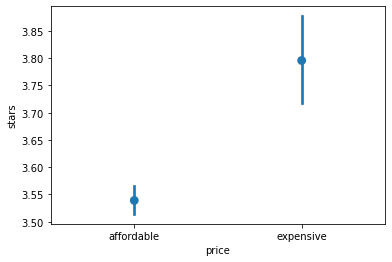

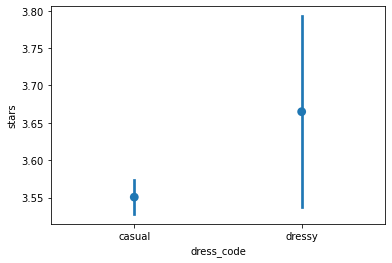

In [9]:

import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


def load_csvs(file: str):
    if file == "business":
        df = pd.read_csv("business.csv")
    else: 
        df = pd.read_csv("review.csv")
    
    df.replace('r\s\s*', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    return df.dropna()



def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')

    

def get_restaurant_price(price):
    first_index = price.find('RestaurantsPriceRange2')
    price = price[first_index:]

    second_index = price.find(',')
    price = price[:second_index]

  
    return price.split(' ')[-1].strip("''")




def get_restaurant_dresscode(price):
    first_index = price.find('RestaurantsAttire')

    price = price[first_index:]

    second_index = price.find(',')
    price = price[:second_index]
    
    
    third_index = price.find('"')
    price = price[third_index:]
    
    fourth_index = price.find("'")
    price = price[fourth_index+1:]
    
    fifth_index = price.find("'")
    
    if price[:fifth_index] == 'formal':
        return 'dressy'
    
    return price[:fifth_index]





def confidence_interval_95(df, conf=0.95):
    t = stats.t.ppf((1+conf) / 2.0, len(df)-1)
    return t * df.sem()




def plot_test(df, x_axis, y_axis):
    fig, plot = plt.subplots()
    plot = sns.pointplot(data=df, x=x_axis, y=y_axis, errorbar="ci", join=False)
    plot.set_ylabel(y_axis)
    plot.set_xlabel(x_axis)
    

    
def print_welch_t_test_stats(population_x, population_y, population_x_name, population_y_name):
    test_value, p_value = stats.ttest_ind(population_x, population_y, equal_var = False)
    
    print("======================================================================================")
    print("Welch's t-test between " + population_x_name + " and " + population_y_name + ":")
    print("-------------------------------------------------------------------------------------- \n")
    
    print("We have " + str(len(population_x)) + " "+ population_x_name + " records.")
    print("Variance of stars distribution for " + population_x_name + " = {} \n".format(str(population_x.var())))
    
    print("We have " + str(len(population_y)) + " " + population_y_name + " records.")
    print("Variance of stars distribution for " + population_y_name + " = {} \n".format(str(population_y.var())))
    
    
    print("Test value = {}.".format(str(test_value)))
    print("p_value = {}.".format(str(p_value)))
    print("======================================================================================\n\n")
    
    
    
def restaurant_affordability_test(df_restaurants, df_business):
    df_restaurants['price'] = df_business['attributes'].apply(lambda x: get_restaurant_price(x))
   
    df_restaurants = df_restaurants.replace(r'^\s*$', np.nan, regex=True).replace(to_replace='None', value=np.nan).dropna()
    df_restaurants = df_restaurants.astype({'price':int})
    
    
    df_restaurants.loc[df_restaurants['price'] > 2, 'price'] = 'expensive'
    df_restaurants.loc[df_restaurants['price'] != 'expensive', 'price'] = 'affordable'
    
    
    plot_test(df_restaurants, 'price', 'stars')
    
    
    df_affordable = df_restaurants.loc[df_restaurants['price'] == 'affordable'].copy()
    df_expensive = df_restaurants.loc[df_restaurants['price'] == 'expensive'].copy()
 
    
    print_welch_t_test_stats(df_affordable['stars'], df_expensive['stars'], 'affordable restaurants', 'expensive restaurants')

    
    return df_restaurants
    
    
    
    
    
    
def restaurant_dress_code_test(df_restaurants, df_business):
    df_restaurants['dress_code'] = df_business['attributes'].apply(lambda x: get_restaurant_dresscode(x))
    
    df_restaurants = df_restaurants.replace(r'^\s*$', np.nan, regex=True).replace(to_replace='None', value=np.nan).dropna()
    df_restaurants = df_restaurants.filter(items=['business_id', 'stars', 'price', 'dress_code'])
     

    plot_test(df_restaurants, 'dress_code', 'stars')
    
    
    df_casual = df_restaurants.loc[df_restaurants['dress_code'] == 'casual'].copy()
    df_dressy = df_restaurants.loc[df_restaurants['dress_code'] == 'dressy'].copy()
    
    
    
    print_welch_t_test_stats(df_casual['stars'], df_dressy['stars'], 'casual dress code restaurants', 'dressy dress code restaurants')
    

    return df_restaurants
   
    
    
    
    
    

def main(): 
    df_business = load_csvs('business')
    print_dataframe_stats(df_business, 'business')
    
    df_restaurants = df_business.loc[df_business['categories'].str.contains('Restaurants')].copy()
    print_dataframe_stats(df_restaurants, 'restaurant')
        
    df_restaurants = restaurant_affordability_test(df_restaurants.copy(), df_business.copy())
    df_restaurants = restaurant_dress_code_test(df_restaurants.copy(), df_business.copy())
    
    
    
    
if __name__ == "__main__":
    main()



Initially, the graph shows that expensive restaurants have on average better star ratings than their affordable counterparts. From the point-plot, we observe that there is no overlap between the confidence intervals of the two means, therefore we expect the t-test to confirm that the means are significantly different, with the star rating mean of expensive restaurants being significantly higher. Indeed, the t-test gives a value of -6.467899493575901 (negative sign because the series with star ratings for expensive restaurants was given as the second argument in the t-test function) and a p-value of 4.1385085653157247*e-10. Therefore, with statistical significance, we can claim that expensive restaurants receive better ratings on average than their affordable counterparts.


On the contrary, from the corresponding graph for dressy and casual restaurants, we initially observe a higher average number of stars for dressy restaurants. However, the overlap in confidence intervals and the large value of the confidence interval for the mean number of stars of dressy restaurants predispose us to low statistical significance in the initial observation. Indeed, while the t-test returns a value of -1.7220171099959927, which confirms that dressy restaurants have a higher average number of stars, the claim does not have statistical significance because the p-value of the t-test is 0.08816029817140275 > 0.05.


The reason why in the second case the superiority of dressy restaurants in terms of star ratings is not statistically confirmed compared to the case of expensive restaurants, is because: <br>

1) The distance in the mean star ratings in the case of dressy-casual restaurants is smaller compared to that of expensive-affordable ones.<br>
2) The amount of data in the case of dressy restaurants is smaller compared to the corresponding amount of expensive restaurants.<br>
3) The variation in star ratings of dressy restaurants is higher compared to that of expensive restaurants.<br>

Taking into account the above and analyzing the formula for the calculation of the 95% confidence interval and the formula for the calculation of the value of Welch's t-test, we understand why in the second case the error is much higher <br>


**95% confidence interval:** $$\Pr\left(\bar{X} - \frac{1.96 \cdot S}{\sqrt{n}} \le \mu \le \bar{X} + \frac{1.96 \cdot S}{\sqrt{n}} \right)=0.95\,$$ <br>

**Welch's t-test:** $$t = \frac{\Delta\overline{X}}{s_{\Delta\bar{X}}} = \frac{\overline{X}_1 - \overline{X}_2}{\sqrt{ {s_{\bar{X}_1}^2} + {s_{\bar{X}_2}^2} }}\,$$

$$s_{\bar{X}_i} = {s_i \over \sqrt{N_i}} \,$$


where : $\overline{X}_i$ is the $i^\text{-th}$ sample mean, $s_i$ is the standard deviation and sample size of $i^\text{-th}$ equal to $N_i$. 






  # How the ambience of a restaurant affects its rating:
  
  From the Attribute column, we will look at the field 'Ambience'. This field is a dictionary with predefined categories and True/False values. A restaurant can have many of these features. We will examine whether places that are good for dates are also "fancy". A restaurant is good for a date if it has a 'romantic' or 'intimate' atmosphere. A restaurant is "fancy" if it has a 'classy' or 'upscale' atmosphere. We will use the 𝜒2-test to examine whether the characteristics are independent.

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats


def load_csvs(file: str):
    if file == "business":
        df = pd.read_csv("business.csv")
    else: 
        df = pd.read_csv("review.csv")
    
    df.replace('r\s\s*', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    return df.dropna()



def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')
    
    
    

def get_ambience_dict(ambience: str):
    first_index = ambience.find('Ambience')
    
    
    if first_index == -1:
        return '{"No_ambience": True}'
        
    
    ambience = ambience[first_index:]
    
    
    
    if 'None' in ambience.split(' ')[1]:
        return '{"No_ambience": True}'
        
    second_index = ambience.find('{')
    ambience = ambience[second_index:]
    
    third_index = ambience.find('}')
    ambience = ambience[:third_index+1]
    
        
    return ambience



def clean_ambience_dict(ambience: str):
    return ambience.replace("u'", "'").replace("'", '"')
    

    
def get_romantic_or_intimate(ambience: dict):
    if 'No_ambience' in ambience:
        return np.nan
    
    if 'intimate' and 'romantic' not in ambience :
        return np.nan
    
   
    if ambience['intimate'] and ambience['romantic'] is None:
        return False
       
    if ambience['intimate'] == 'None' and ambience['romantic'] == 'None':
        return False
    
   
    if (ambience['intimate'] or ambience['romantic']) is True:
        return True
    else:
        return False
    
    

    
    
def get_classy_or_upscale(ambience: dict):
    
    if 'No_ambience' in ambience:
        return np.nan
    
    if 'classy' and 'upscale' not in ambience :
        return np.nan
    
    if ambience['classy'] and ambience['upscale'] is None:
        return False
    
    if ambience['classy'] == 'None' and ambience['upscale'] == 'None':
        return False
    
   
    if (ambience['classy'] or ambience['upscale']) is True:
        return True
    else:
        return False
    
    
    
def print_contingency_table(series_a, series_b, series_a_name, series_b_name):
    cdf = pd.crosstab(series_a, series_b)
    print("==================================================================")
    print("Contigency table for " + series_a_name + " and " + series_b_name + " :")
    print("------------------------------------------------------------------\n")
    print(cdf)
    print("================================================================== \n")
    
    return cdf


def print_chi_squared_test_stats(cdf, series_a_name, series_b_name):
    chi2_value, p_value, dof, expected = (stats.chi2_contingency(cdf))
    
    print("==================================================================")
    print("Chi-squared test for " + series_a_name + " and " + series_b_name + ": ")
    print("------------------------------------------------------------------\n")
    print("Chi-squared test value = " + str(chi2_value))
    print("p-value = " + str(p_value))
    print("Degrees of freedom: " + str(dof))
    print("Expected frequencies table: ", end = '')
    print(expected)
    print("==================================================================")
    


def main(): 
    df_business = load_csvs('business')
    print_dataframe_stats(df_business, 'business')
    
    df_restaurants = df_business.loc[df_business['categories'].str.contains('Restaurants')].copy()
    print_dataframe_stats(df_restaurants, 'restaurant')
        
  
        
    df_restaurants['attributes'] = df_restaurants['attributes'].apply(lambda x: get_ambience_dict(x))
    df_restaurants['attributes'] = df_restaurants['attributes'].apply(lambda x: clean_ambience_dict(x))
    df_restaurants['attributes'] = df_restaurants['attributes'].apply(lambda x: eval(x))
    
    
    df_restaurants['romantic'] = df_restaurants['attributes'].copy().apply(lambda x: get_romantic_or_intimate(x))
    df_restaurants['classy'] = df_restaurants['attributes'].copy().apply(lambda x: get_classy_or_upscale(x))
    
    
    
    df_restaurants = df_restaurants.replace(to_replace='None', value=np.nan).dropna()
    
    print_dataframe_stats(df_restaurants, 'restaurant (after adding romantic and classy columns)')

    cdf = print_contingency_table(df_restaurants['romantic'], df_restaurants['classy'], 
                                  "romantic restaurants", "classy restaurants")
    
    print_chi_squared_test_stats(cdf, "romantic restaurants", "classy restaurants")
    
    
    
if __name__ == "__main__":
    main()





business dataframe has length = 10692

Null values for every column of business dataframe: 

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


restaurant dataframe has length = 4810

Null values for every column of restaurant dataframe: 

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


restaurant (after adding romantic and classy columns) dataframe has length = 3884

Null values for every column of restaurant (after adding romantic and classy columns) dataframe: 

business_id     0
name            0
address         0
city            0
state           0
posta



   Initially, we consider the Null-Hypothesis that the 2 variables of the number of restaurants with classy atmosphere and the number of restaurants with romantic atmosphere are independent. Therefore, to reject the Null-Hypothesis, we need to calculate the degrees of freedom, calculate the expected value for the number of restaurants in each possible case (e.g. expected number of restaurants that are both classy and romantic, classy or romantic, etc.), and the value returned by the test should be greater than the value returned by the $χ^2$-distribution for the degrees of freedom corresponding to the contingency table (in our case, 1 degree of freedom, since we have 2 columns and 2 rows. Therefore, dof = (2-1) * (2-1) = 1). We observe that the value returned by the $χ^2$-test is equal to 123.25101990908382. If we refer to the $χ^2$-distribution table, we will notice that for 1 degree of freedom and α = 0.05 (minimum level of confidence to consider the test statistically significant, i.e. the maximum probability that the Null-Hypothesis can occur) the value given by the distribution is equal to 3.84.

   Therefore, we observe that in our case we expect the Alternative Hypothesis to be true with an extremely high statistical significance, given that the test returned a value of 123.25101990908382 which is much larger than 3.84. In fact, the p-value of the test is equal to a number very close to 0, since p-value = 1.2287711088348392e-28. The very high value of the test results from the fact that the frequencies given by the contingency table, i.e., the observed frequencies we obtained from the "experiment," are very far from the corresponding expected values, given that the 2 variables are independent. For example, let's take the case where we calculate the expected value for a restaurant to be "romantic" (181 occurrences) but also "classy" (763 occurrences). The expected number of restaurants that belong to both categories will be calculated using the formula of the expected value for the binomial distribution. If we set the number of trials (N) as the total number of romantic restaurants and the probability of success as the probability of a restaurant being classy (intuitively thinking about how many classy restaurants we will have, i.e. how many successes we will have if we choose N romantic restaurants, i.e. perform N independent experiments), we can calculate the expected number of restaurants in both categories. Specifically, 
$$ 181\cdot \frac{763}{3884}=35.5569$$ which is quite far from the observed result which is equal to 94. Therefore, the value $\frac{(94 - 35.5569)^{2}}{35.5569}=96.0600035$ will be added to the value that the test will return. Similarly, we work with the other possible scenarios. Thus, it becomes evident that the case of the two events being independent is not actually based on the first of the four observed possible scenarios from the contingency table.

# Similar area value implies similar business category vectors?

For each postal code, we will create a vector with the frequency of occurrence of different categories (we will exclude the category "Restaurants" which is too frequent). One hypothesis is that areas with similar values also have similar category vectors. We will design an experiment to test this hypothesis.

Note: we remove the category "Restaurants", which is way too frequent among areas (postal codes).

business dataframe has length = 10692

Null values for every column of business dataframe: 

business_id     0
name            0
address         0
city            0
state           0
region          0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


Pearson correlation matrix:
                 vector_distance  price_distance
vector_distance         1.000000        0.981266
price_distance          0.981266        1.000000
p-values for pearson correlation t-test:


p-value for vector_distance-vector_distance = 0.0
p-value for vector_distance-price_distance = 0.0


p-value for price_distance-vector_distance = 0.0
p-value for price_distance-price_distance = 0.0
95% confidence intervals:
Vector distance 95% ci = 29.08246439544542
Price distance 95% ci = 5587.547194133717




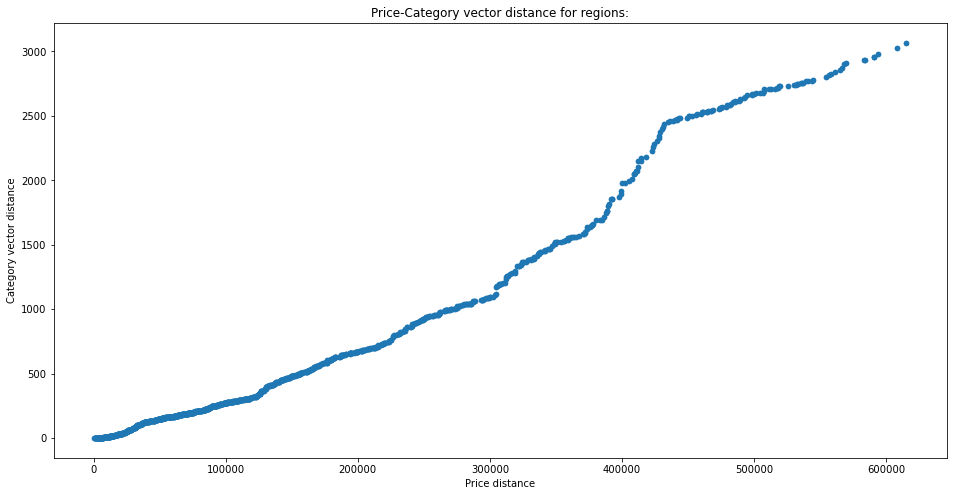

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt




def load_csvs(file: str):
    if file == "business":
        df = pd.read_csv("business.csv")
    else: 
        df = pd.read_csv("review.csv")
    
    df.replace('r\s\s*', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    return df.dropna()



def load_and_preprocess():
    df = pd.read_csv('RedfinPhila.tsv', sep='\t', header=0)  # load .tsv
    df = df[['region', 'median_sale_price']]
    
    df['median_sale_price'] = df.groupby('region')['median_sale_price'].transform('mean')
    
    df['region'] = df['region'].str.replace('Zip Code: ', '').astype(int)
    
    return df.drop_duplicates()



def clean_dict_line(dict_line: str):
    return dict_line.replace("u'", "'").replace('"', '')



def print_dataframe_stats(df, df_name: str):
    print(df_name + " dataframe has length = {}\n".format(str(len(df))))
    print("Null values for every column of " + df_name + " dataframe: \n")
    print(df.isnull().sum())
    print('\n')
    
def get_categories_vector(categories: str):
    categories = categories.split(', ')
    
    # remove 'Restaurants' category from the vector.
    categories = [cat for cat in categories if 'Restaurants' not in cat]
    categories_vector = {x:categories.count(x) for x in categories}
  
    return categories_vector


def calculate_vector_difference(dict1, dict2):
    # calculate the sum of absolute difference between the occurences of pairs of categories
    # 
    return (sum({key: abs(dict1[key]-dict2[key]) for key in dict1 if key in dict2}.values()))


def confidence_interval_95(df, conf=0.95):
    t = stats.t.ppf((1+conf) / 2.0, len(df)-1)
    return t * df.sem()


def print_pearson_corr(df):
    print('==============================================================================================')
    print("Pearson correlation matrix:")
    print('==============================================================================================')
    df_corr = df.corr(method='pearson')
    print(df_corr)
    print('==============================================================================================')
    print('p-values for pearson correlation t-test:')
    print('==============================================================================================')
    for column_name_i in df.columns:
        print('\n')
        for column_name_j in df.columns:
            p_value = str(stats.pearsonr(df[column_name_i], df[column_name_j])[1])
            print('p-value for ' + column_name_i + '-' + column_name_j + ' = {}'.format(p_value))
    print('==============================================================================================')
    print('95% confidence intervals:')
    print('==============================================================================================')
    ci95_vector_distance = str(confidence_interval_95(df['vector_distance']))
    ci95_price = str(confidence_interval_95(df['price_distance']))
    print("Vector distance 95% ci = " + ci95_vector_distance)
    print("Price distance 95% ci = " + ci95_price)
    print('============================================================================================== \n\n')


    
def main():
    df_business = load_csvs('business').rename(columns={'postal_code':'region'})
    
    print_dataframe_stats(df_business, 'business')
    
    df = df_business.groupby(['region'])['categories'].apply(lambda x: ', '.join(x)).apply(lambda x: get_categories_vector(x)).reset_index()
    
    df_business = pd.merge(df_business, df, on='region', how='left').dropna().drop_duplicates(subset=['region'])    
    df_business = df_business[['region', 'categories_y']].rename(columns={'categories_y':'categories'})
  
    df_real_estate = load_and_preprocess()
    df_area = pd.merge(df_business, df_real_estate, on='region', how='left').dropna().drop_duplicates(subset=['region'])
    df_area = df_area[['region', 'categories', 'median_sale_price']]
    
   
    
    region_categories_array = df_area[["categories"]].to_numpy()
    region_median_sale_price_array = df_area[["median_sale_price"]].to_numpy()
    
    vector_difference_distribution = []
    price_difference_distribution = []
    for idx, el in enumerate(region_categories_array):
        for jdx, jel in enumerate(region_categories_array):
            if idx != jdx:
                vector_difference_distribution.append(calculate_vector_difference(el[0], jel[0]))
                price_difference_distribution.append(abs(region_median_sale_price_array[idx][0] - region_median_sale_price_array[jdx][0]))
   
    
    

    df_difference = pd.DataFrame({'vector_distance':sorted(vector_difference_distribution), 'price_distance':sorted(price_difference_distribution)})
    print_pearson_corr(df_difference)
    
    difference_plot = df_difference.plot(kind='scatter', x='price_distance', y='vector_distance', figsize=(16,8), 
                                                 title="Price-Category vector distance for regions:")
    
    difference_plot.set_xlabel("Price distance")
    difference_plot.set_ylabel("Category vector distance")
    
if __name__ == "__main__":

    main()

To conduct the experiment, I initially joined every appearance of each category for all regions in a list using groupby(['region'])['categories'].apply(join). Then, I removed 'Restaurant' from the lists, counted the occurrences of each category, and saved them in a dictionary (column "categories" in the dataframe "df_area"). Next, the value of each region (column "median_sale_price" in the dataframe "df_area") and the category dictionaries (column "categories" in the dataframe "df_area") are saved as numpy arrays (region_median_sale_price_array and region_categories_array, respectively). In the lists price_difference_distribution and vector_difference_distribution, all possible differences in value and category vectors among all regions are saved, starting from the region in the 1st row of df_area, and so on. Then, a Pearson t-test is executed, returning a zero p-value and a correlation of 0.981266 between the two lists. The results of the t-test show us a clear positive correlation between the difference in value and the difference in category vectors between two regions. Specifically, the zero p-value proves the statistical significance regarding the correlation of the two variables to a degree that the Null-Hypothesis (the assumption that the two variables are not correlated) is essentially unlikely to occur. The clear correlation can also be easily understood from the scatter plot of the two variables. The two variables have almost perfectly positive linearity between them, which confirms the high value of the Pearson t-test.


### Calculation of category vectors distance:
The way to calculate the distance between two category vectors is by using function "calculate_vector_difference":
1) Every vector is a dictionary with keys the names of each category and values the frequency of appearance of each category in the rows of each region <br>
2) To find the distance between 2 vectors, we calculate the sum of the absolute differences in the values (frequency of occurrence) of each key (category name).
